# BBO Testing

In [1]:
# import bz2

# # Compressing a file
# with open('bbo-2024-41.csv', 'rb') as f:
#     content = f.read()
#     compressed_content = bz2.compress(content)

# with open('bbo-2024-41.csv.bz2', 'wb') as f:
#     f.write(compressed_content)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('bbo-2024-41.csv')
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df

,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus
Time,,,,,,,,,
2024-10-06 10:03:58.595406,544,563,A,VXV4,16.00,50,0.0,0,Q
2024-10-06 10:03:58.595406,627,635,A,VXV4,16.55,1,0.0,0,Q
2024-10-06 10:03:58.595406,627,636,A,VXV4,16.55,2,0.0,0,Q
2024-10-06 10:03:58.595406,627,637,A,VXV4,16.60,1,0.0,0,Q
2024-10-06 10:03:58.595406,627,638,A,VXV4,16.60,2,0.0,0,Q
...,...,...,...,...,...,...,...,...,...
2024-10-11 16:00:01.575645,1491615,1491615,D,VXH5,11.80,2,0.0,0,S
2024-10-11 16:00:01.575645,1491618,1491618,D,VXMX4,0.00,0,0.0,0,S
2024-10-11 16:00:01.575645,1491618,1491619,D,VXMV4,0.00,0,0.0,0,S


1. For the same timestamp and symbol, only keep the last record, since they are from the same event. 
2. Select the trading status to be "Trading"

In [4]:
df = df.groupby(['Time','Symbol']).tail(1)
df

,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus
Time,,,,,,,,,
2024-10-06 10:03:58.595406,4507,4536,A,VXV4,20.40,76,20.50,62,Q
2024-10-06 10:03:58.595406,4547,4563,A,ZVXV4,5.00,3,0.00,0,Q
2024-10-06 10:03:58.595406,8227,8254,A,VXX4,19.25,135,19.30,129,Q
2024-10-06 10:03:58.595406,8307,8339,A,-VXV4+VXX4,-1.19,3,-1.11,3,Q
2024-10-06 10:03:58.595406,11347,11373,A,VXZ4,18.85,107,18.95,100,Q
...,...,...,...,...,...,...,...,...,...
2024-10-11 16:00:01.574477,1491609,1491610,D,VXF5,11.70,2,0.00,0,S
2024-10-11 16:00:01.575645,1491618,1491618,D,VXMX4,0.00,0,0.00,0,S
2024-10-11 16:00:01.575645,1491618,1491619,D,VXMV4,0.00,0,0.00,0,S


In [ ]:
df = df[df['TradingStatus'] == 'T']
df

,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus
Time,,,,,,,,,
2024-10-06 17:00:00.000686,43088,43105,E,VXV4,20.30,221,20.35,35,T
2024-10-06 17:00:00.000686,43088,43106,E,VXX4,19.25,124,19.30,104,T
2024-10-06 17:00:00.055626,45190,45205,D,VXV4,20.30,217,20.35,35,T
2024-10-06 17:00:00.055644,45190,45207,A,VXV4,20.30,217,20.35,47,T
2024-10-06 17:00:00.055653,45190,45208,D,VXV4,20.30,197,20.35,47,T
...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:59.060798,1467390,1467390,D,VXMZ4,18.80,22,18.98,10,T
2024-10-11 15:59:59.063235,1467393,1467393,D,VXMZ4,18.80,22,19.05,20,T
2024-10-11 15:59:59.065735,1467396,1467396,D,VXMF5,19.05,21,19.28,10,T


In [ ]:
df['tradeDate'] = df.index.date
df['tradeDate'] = np.where(df.index.time > pd.to_datetime('17:00:00').time(), 
                               df['tradeDate'] + pd.Timedelta(days=1), 
                               df['tradeDate'])

,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus
Time,,,,,,,,,
2024-10-06 17:00:00.000686,43088,43105,E,VXV4,20.3,221,20.35,35,T
2024-10-06 17:00:00.055626,45190,45205,D,VXV4,20.3,217,20.35,35,T
2024-10-06 17:00:00.055644,45190,45207,A,VXV4,20.3,217,20.35,47,T
2024-10-06 17:00:00.055653,45190,45208,D,VXV4,20.3,197,20.35,47,T
2024-10-06 17:00:00.055670,45190,45213,D,VXV4,20.3,152,20.35,47,T
...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:58.000675,1467042,1467044,D,VXV4,21.2,30,21.25,100,T
2024-10-11 15:59:58.000782,1467064,1467076,A,VXV4,21.2,30,21.25,108,T
2024-10-11 15:59:58.003223,1467228,1467228,D,VXV4,21.2,30,21.25,101,T


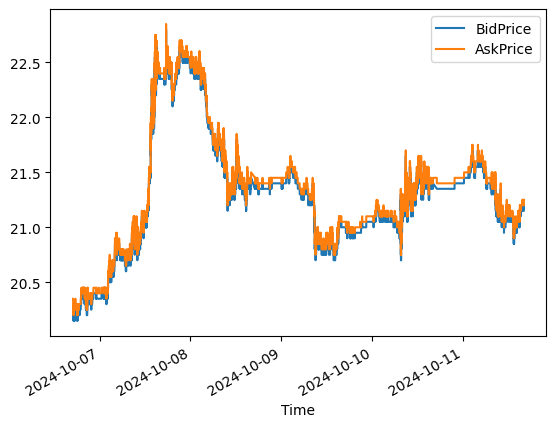

In [6]:
df_vxv4 = df_active[df_active['Symbol'] == 'VXV4']
df_vxv4[['BidPrice','AskPrice']].plot()
display(df_vxv4)

,PktSeqNum,MsgSeqNum,MsgType,Symbol,BidPrice,BidQuantity,AskPrice,AskQuantity,TradingStatus
Time,,,,,,,,,
2024-10-06 17:00:00.208447,45558,45591,A,VXMV4,20.35,4,20.40,21,T
2024-10-06 17:00:00.208467,45558,45593,A,VXMV4,20.35,5,20.40,21,T
2024-10-06 17:00:00.210910,45558,45596,E,VXMV4,20.35,4,20.40,21,T
2024-10-06 17:00:00.217508,45601,45605,D,VXMV4,20.35,3,20.40,21,T
2024-10-06 17:00:00.218662,45601,45608,A,VXMV4,20.35,3,20.40,22,T
...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:57.047595,1466692,1466697,D,VXMV4,21.21,1,21.24,1,T
2024-10-11 15:59:57.047646,1466704,1466706,A,VXMV4,21.21,2,21.24,1,T
2024-10-11 15:59:57.047852,1466742,1466743,D,VXMV4,21.21,2,21.25,3,T


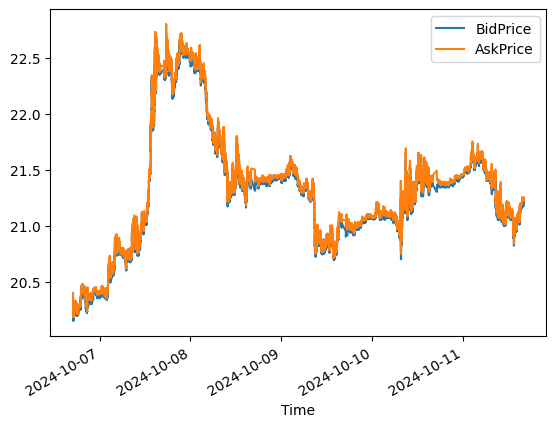

In [7]:
df_vxmv4 = df_active[df_active['Symbol'] == 'VXMV4']
df_vxmv4[['BidPrice','AskPrice']].plot()
display(df_vxmv4)

In [8]:
df_arb = df_vxv4.merge(df_vxmv4, on='Time', how='outer',suffixes=('_VXV4', '_VXMV4')).sort_values('Time').fillna(method='ffill').dropna()
df_arb

,PktSeqNum_VXV4,MsgSeqNum_VXV4,MsgType_VXV4,Symbol_VXV4,BidPrice_VXV4,BidQuantity_VXV4,AskPrice_VXV4,AskQuantity_VXV4,TradingStatus_VXV4,PktSeqNum_VXMV4,MsgSeqNum_VXMV4,MsgType_VXMV4,Symbol_VXMV4,BidPrice_VXMV4,BidQuantity_VXMV4,AskPrice_VXMV4,AskQuantity_VXMV4,TradingStatus_VXMV4
Time,,,,,,,,,,,,,,,,,,
2024-10-06 17:00:00.208447,45558.0,45576.0,D,VXV4,20.3,127.0,20.35,35.0,T,45558.0,45591.0,A,VXMV4,20.35,4.0,20.40,21.0,T
2024-10-06 17:00:00.208467,45558.0,45576.0,D,VXV4,20.3,127.0,20.35,35.0,T,45558.0,45593.0,A,VXMV4,20.35,5.0,20.40,21.0,T
2024-10-06 17:00:00.210910,45558.0,45576.0,D,VXV4,20.3,127.0,20.35,35.0,T,45558.0,45596.0,E,VXMV4,20.35,4.0,20.40,21.0,T
2024-10-06 17:00:00.215201,45558.0,45597.0,A,VXV4,20.3,166.0,20.35,35.0,T,45558.0,45596.0,E,VXMV4,20.35,4.0,20.40,21.0,T
2024-10-06 17:00:00.217479,45601.0,45603.0,D,VXV4,20.3,163.0,20.35,35.0,T,45558.0,45596.0,E,VXMV4,20.35,4.0,20.40,21.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-11 15:59:58.000782,1467064.0,1467076.0,A,VXV4,21.2,30.0,21.25,108.0,T,1467042.0,1467042.0,D,VXMV4,21.21,1.0,21.25,3.0,T
2024-10-11 15:59:58.003223,1467228.0,1467228.0,D,VXV4,21.2,30.0,21.25,101.0,T,1467042.0,1467042.0,D,VXMV4,21.21,1.0,21.25,3.0,T
2024-10-11 15:59:58.003718,1467242.0,1467242.0,D,VXV4,21.2,30.0,21.25,96.0,T,1467042.0,1467042.0,D,VXMV4,21.21,1.0,21.25,3.0,T


In [21]:
df_arb['AskPriceImprovement'] = (df_arb['AskPrice_VXMV4'] - df_arb['AskPrice_VXV4'])
df_arb['BidPriceImprovement'] = (df_arb['BidPrice_VXMV4'] - df_arb['BidPrice_VXV4'])
df_arb['Abitrage1'] = (df_arb['BidPrice_VXMV4'] - df_arb['AskPrice_VXV4']).abs()*np.minimum(df_arb['AskQuantity_VXV4'],df_arb['BidQuantity_VXMV4']/10)*1000
df_arb['Abitrage2'] = (df_arb['BidPrice_VXV4'] - df_arb['AskPrice_VXMV4']).abs()*np.minimum(df_arb['AskQuantity_VXV4'],df_arb['BidQuantity_VXMV4']/10)*1000
df_arb.head(10)

,PktSeqNum_VXV4,MsgSeqNum_VXV4,MsgType_VXV4,Symbol_VXV4,BidPrice_VXV4,BidQuantity_VXV4,AskPrice_VXV4,AskQuantity_VXV4,TradingStatus_VXV4,PktSeqNum_VXMV4,...,Symbol_VXMV4,BidPrice_VXMV4,BidQuantity_VXMV4,AskPrice_VXMV4,AskQuantity_VXMV4,TradingStatus_VXMV4,AskPriceImprovement,BidPriceImprovement,Abitrage1,Abitrage2
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-06 17:00:00.208447,45558.0,45576.0,D,VXV4,20.3,127.0,20.35,35.0,T,45558.0,...,VXMV4,20.35,4.0,20.4,21.0,T,0.05,0.05,0.0,40.0
2024-10-06 17:00:00.208467,45558.0,45576.0,D,VXV4,20.3,127.0,20.35,35.0,T,45558.0,...,VXMV4,20.35,5.0,20.4,21.0,T,0.05,0.05,0.0,50.0
2024-10-06 17:00:00.210910,45558.0,45576.0,D,VXV4,20.3,127.0,20.35,35.0,T,45558.0,...,VXMV4,20.35,4.0,20.4,21.0,T,0.05,0.05,0.0,40.0
2024-10-06 17:00:00.215201,45558.0,45597.0,A,VXV4,20.3,166.0,20.35,35.0,T,45558.0,...,VXMV4,20.35,4.0,20.4,21.0,T,0.05,0.05,0.0,40.0
2024-10-06 17:00:00.217479,45601.0,45603.0,D,VXV4,20.3,163.0,20.35,35.0,T,45558.0,...,VXMV4,20.35,4.0,20.4,21.0,T,0.05,0.05,0.0,40.0
2024-10-06 17:00:00.217508,45601.0,45603.0,D,VXV4,20.3,163.0,20.35,35.0,T,45601.0,...,VXMV4,20.35,3.0,20.4,21.0,T,0.05,0.05,0.0,30.0
2024-10-06 17:00:00.218662,45601.0,45603.0,D,VXV4,20.3,163.0,20.35,35.0,T,45601.0,...,VXMV4,20.35,3.0,20.4,22.0,T,0.05,0.05,0.0,30.0
2024-10-06 17:00:00.218759,45601.0,45603.0,D,VXV4,20.3,163.0,20.35,35.0,T,45601.0,...,VXMV4,20.35,2.0,20.4,22.0,T,0.05,0.05,0.0,20.0
2024-10-06 17:00:00.218830,45601.0,45615.0,D,VXV4,20.3,161.0,20.35,35.0,T,45601.0,...,VXMV4,20.35,2.0,20.4,22.0,T,0.05,0.05,0.0,20.0


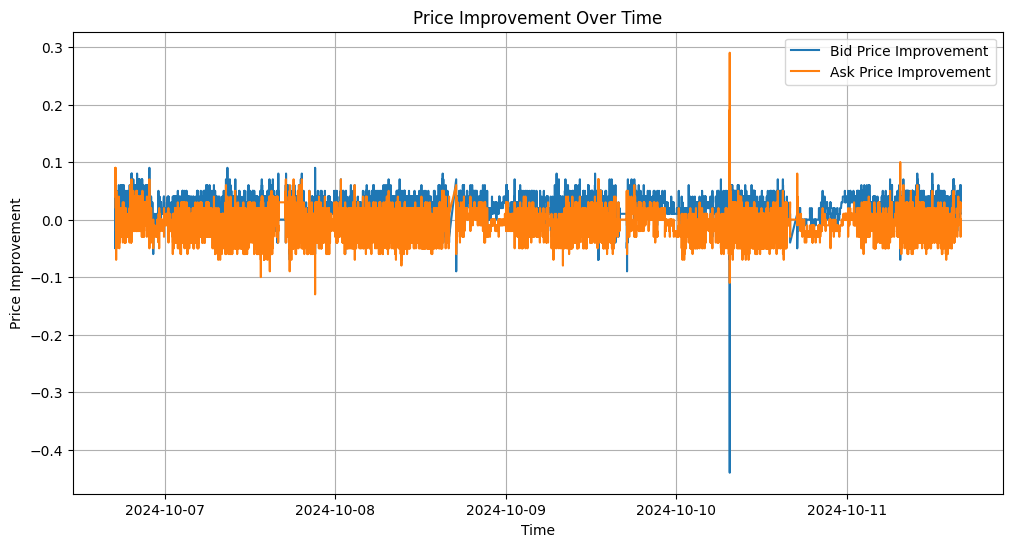

In [10]:
# Plot the price improvement over time and quantities as box plots
plt.figure(figsize=(12, 6))

# Subplot 1: Price Improvement Over Time
plt.plot( df_arb['BidPriceImprovement'], label='Bid Price Improvement')
plt.plot( df_arb['AskPriceImprovement'], label='Ask Price Improvement')
plt.xlabel('Time')
plt.ylabel('Price Improvement')
plt.title('Price Improvement Over Time')
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot: xlabel='Time'>

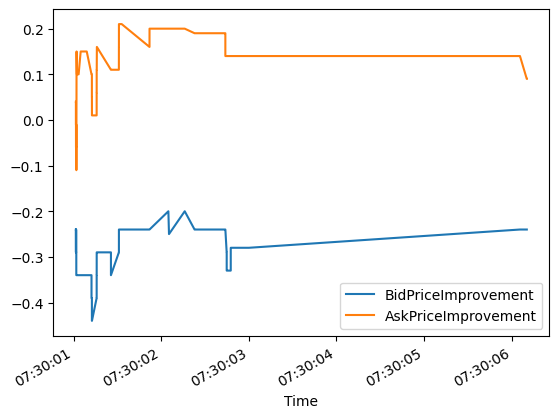

In [15]:
df_arb[df_arb['BidPriceImprovement']<-0.2][['BidPriceImprovement','AskPriceImprovement']].plot()

<AxesSubplot: xlabel='Time'>

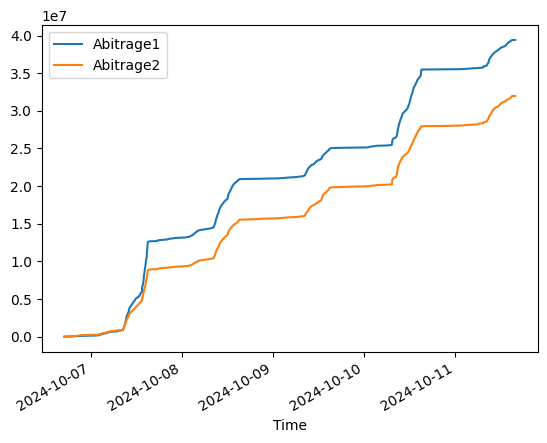

In [23]:
df_arb[['Abitrage1','Abitrage2']].cumsum().plot()